### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [2]:
data = pd.read_csv('../data/coupons.csv')

In [3]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64


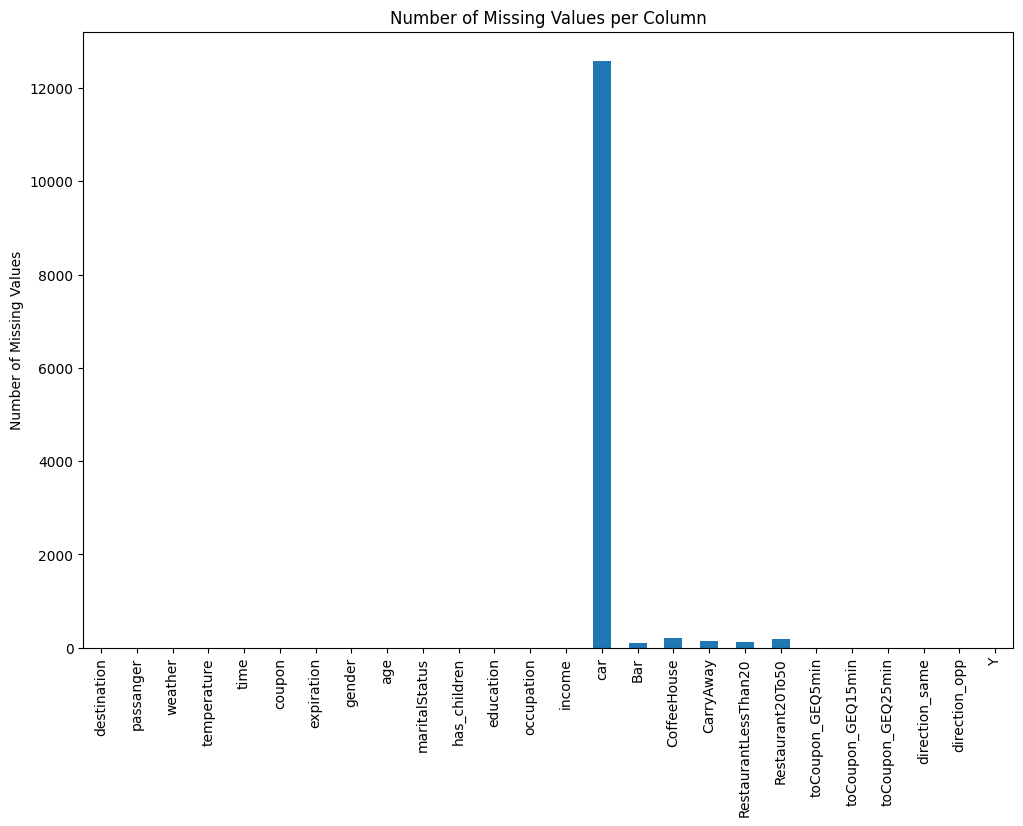

In [4]:
# Check for Missing Data
missing_values = data.isnull().sum()
print(missing_values)

# Visualize missing values in the data set
plt.figure(figsize=(12,8))
missing_values.plot(kind='bar')
plt.title('Number of Missing Values per Column')
plt.ylabel('Number of Missing Values')
plt.show()

In [5]:
# Check data types to make sure they are correct and make sense
print(data.dtypes)

destination             object
passanger               object
weather                 object
temperature              int64
time                    object
coupon                  object
expiration              object
gender                  object
age                     object
maritalStatus           object
has_children             int64
education               object
occupation              object
income                  object
car                     object
Bar                     object
CoffeeHouse             object
CarryAway               object
RestaurantLessThan20    object
Restaurant20To50        object
toCoupon_GEQ5min         int64
toCoupon_GEQ15min        int64
toCoupon_GEQ25min        int64
direction_same           int64
direction_opp            int64
Y                        int64
dtype: object


3. Decide what to do about your missing data -- drop, replace, other...

In [6]:
# Will replace missing 'car' values with 'Unknown'
data['car'].replace('', 'Unknown', inplace=True)
data['car'].fillna('Unknown', inplace=True)

# Save changes to a modified csv file
data.to_csv('../data/exploratory_analysis/coupons_mod.csv', index=False)

# Although Bar, CoffeeHouse, CarryAway, RestaurantLessThan20, Restaurant20To50 have missing values, we leave blank

4. What proportion of the total observations chose to accept the coupon? 



In [7]:
# find the mean value of the 'Y' column
accepted_proportion = data['Y'].mean()

print(f"The proportion of observations that chose to accept the coupon is: {accepted_proportion:.2%}")

The proportion of observations that chose to accept the coupon is: 56.84%


5. Use a bar plot to visualize the `coupon` column.

/usr/local/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


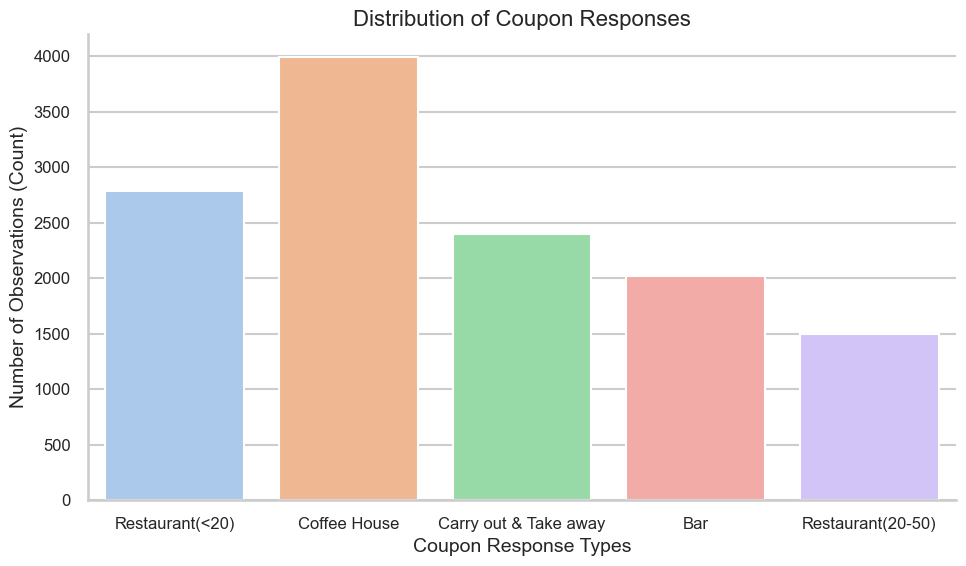

In [8]:
# Set a specific seaborn theme
sns.set_theme(style="whitegrid")
sns.set_context("talk")

# Create bar chart
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='coupon', palette='pastel')

# Modify chart to make it look nice
plt.title('Distribution of Coupon Responses', fontsize=16)
plt.xlabel('Coupon Response Types', fontsize=14)
plt.ylabel('Number of Observations (Count)', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.despine()
plt.tight_layout()
plt.show()

6. Use a histogram to visualize the temperature column.

/usr/local/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


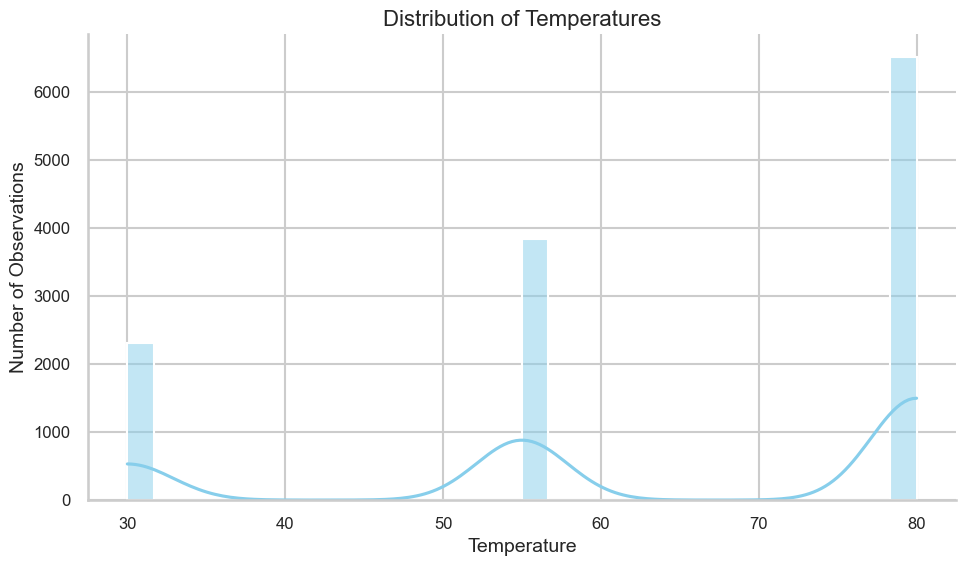

In [9]:
# Set theme and context for the histogram
sns.set_theme(style="whitegrid")
sns.set_context("talk")

# Create a histogram for temperature
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x="temperature", kde=True, bins=30, color='skyblue')

# Add relevant histogram changes
plt.title("Distribution of Temperatures", fontsize=16)
plt.xlabel('Temperature', fontsize=14)
plt.ylabel('Number of Observations', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.despine()
plt.tight_layout()
plt.show()


**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [10]:
df_barOnly = data[data['coupon'] == 'Bar']
print(df_barOnly.head())
type(df_barOnly)

        destination  passanger weather  temperature  time coupon expiration  \
9   No Urgent Place     Kid(s)   Sunny           80  10AM    Bar         1d   
13             Home      Alone   Sunny           55   6PM    Bar         1d   
17             Work      Alone   Sunny           55   7AM    Bar         1d   
24  No Urgent Place  Friend(s)   Sunny           80  10AM    Bar         1d   
35             Home      Alone   Sunny           55   6PM    Bar         1d   

    gender age      maritalStatus  ...  CoffeeHouse CarryAway  \
9   Female  21  Unmarried partner  ...        never       NaN   
13  Female  21  Unmarried partner  ...        never       NaN   
17  Female  21  Unmarried partner  ...        never       NaN   
24    Male  21             Single  ...        less1       4~8   
35    Male  21             Single  ...        less1       4~8   

   RestaurantLessThan20 Restaurant20To50 toCoupon_GEQ5min toCoupon_GEQ15min  \
9                   4~8              1~3               

pandas.core.frame.DataFrame

2. What proportion of bar coupons were accepted?


In [11]:
# Calculate proportion by finding mean of Y column
proportion_accepted = df_barOnly['Y'].mean()
print(f"Proportion of bar coupons accepted: {proportion_accepted:.2%}")

Proportion of bar coupons accepted: 41.00%


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [12]:
# Remove missing or blank values
df_barOnly['Bar'].replace("", pd.NA, inplace=True)

# Remove rows with NaN values in the 'Bar' column
bar_df_cleaned = df_barOnly.dropna(subset=['Bar'])

# Group (3 or fewer and more than 3) and compare means
group_1 = bar_df_cleaned[bar_df_cleaned['Bar'].isin(
    ['1~3', 'less1', 'never'])]['Y']
group_2 = bar_df_cleaned[bar_df_cleaned['Bar'].isin(['4~8', 'gt8'])]['Y']

# Calculate acceptance rate for each group
acceptance_rate_group_1 = group_1.mean()
acceptance_rate_group_2 = group_2.mean()

print(
    f"Acceptance rate for those who went to a bar 3 or fewer times a month: {acceptance_rate_group_1:.2%}")
print(
    f"Acceptance rate for those who went to a bar more than 3 times a month: {acceptance_rate_group_2:.2%}")


Acceptance rate for those who went to a bar 3 or fewer times a month: 37.06%
Acceptance rate for those who went to a bar more than 3 times a month: 76.88%


/var/folders/lj/y3wzm8f906j8cq35tg19hfth0000gr/T/ipykernel_4501/1951436821.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_barOnly['Bar'].replace("", pd.NA, inplace=True)


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [13]:
print("age column type: " + f"{bar_df_cleaned['age'].dtypes}")
print(f"Unique types in column: {bar_df_cleaned['age'].unique()}")

# Classify if age is over 25
def is_over_25(age):
    if age in ['50plus', 'below21']:
        return age == '50plus'
    else:
        return int(age) > 25


# Apply the function to the Age column to create a boolean mask
over_25_mask = bar_df_cleaned['age'].apply(is_over_25)

# Group A: Drivers who go to a bar more than once a month and are over 25
group_A = bar_df_cleaned[(bar_df_cleaned['Bar'].isin(
    ['1~3', '4~8', 'gt8'])) & over_25_mask]['Y']

#Group B: Everyone else
group_B = bar_df_cleaned[~bar_df_cleaned.index.isin(group_A.index)]['Y']

# Calculate acceptance rate for each group
acceptance_rate_group_A = group_A.mean()
acceptance_rate_group_B = group_B.mean()

print(
    f"Acceptance rate for drivers who go to a bar more than once a month and are over 25: {acceptance_rate_group_A:.2%}")
print(f"Acceptance rate for all other drivers: {acceptance_rate_group_B:.2%}")

# Check if there's a difference
difference = acceptance_rate_group_A - acceptance_rate_group_B
print(f"Difference in acceptance rates: {difference:.2%}")


age column type: object
Unique types in column: ['21' '46' '26' '31' '41' '50plus' '36' 'below21']
Acceptance rate for drivers who go to a bar more than once a month and are over 25: 69.52%
Acceptance rate for all other drivers: 33.44%
Difference in acceptance rates: 36.08%


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [14]:
# Analyze has_children and occupation columns
print("passanger column type: " + f"{bar_df_cleaned['passanger'].dtypes}")
print(f"Unique types in column: {bar_df_cleaned['passanger'].unique()}")

print("occupation column type: " +
      f"{bar_df_cleaned['occupation'].dtypes}")
print(f"Unique types in column: {bar_df_cleaned['occupation'].unique()}")


def no_kid_passanger(x):
    return x in ['Alone', 'Friend(s)', 'Partner']

# Create vars for masking
no_kid_passanger_mask = bar_df_cleaned['passanger'].apply(no_kid_passanger)
not_farmFishForest_occupation = bar_df_cleaned['occupation'].apply(lambda x: x != 'Farming Fishing & Forestry')
more_than_once_a_month_mask = bar_df_cleaned['Bar'].isin(['1~3', '4~8', 'gt8'])

# Combine masks
combined_criteria_mask = more_than_once_a_month_mask & no_kid_passanger_mask & not_farmFishForest_occupation

# Group meeting the criteria
group_criteria = bar_df_cleaned[combined_criteria_mask]['Y']

# Group not meeting the criteria
group_not_criteria = bar_df_cleaned[~combined_criteria_mask]['Y']

#Calculate acceptance rates
acceptance_rate_criteria = group_criteria.mean()
acceptance_rate_not_criteria = group_not_criteria.mean()

print(
    f"Acceptance rate for group meeting the criteria: {acceptance_rate_criteria:.2%}")
print(
    f"Acceptance rate for group not meeting the criteria: {acceptance_rate_not_criteria:.2%}")


passanger column type: object
Unique types in column: ['Kid(s)' 'Alone' 'Friend(s)' 'Partner']
occupation column type: object
Unique types in column: ['Unemployed' 'Architecture & Engineering' 'Student'
 'Education&Training&Library' 'Healthcare Support'
 'Healthcare Practitioners & Technical' 'Sales & Related' 'Management'
 'Arts Design Entertainment Sports & Media' 'Computer & Mathematical'
 'Life Physical Social Science' 'Personal Care & Service'
 'Community & Social Services' 'Office & Administrative Support'
 'Construction & Extraction' 'Legal' 'Retired'
 'Installation Maintenance & Repair' 'Transportation & Material Moving'
 'Business & Financial' 'Protective Service'
 'Food Preparation & Serving Related' 'Production Occupations'
 'Building & Grounds Cleaning & Maintenance' 'Farming Fishing & Forestry']
Acceptance rate for group meeting the criteria: 71.32%
Acceptance rate for group not meeting the criteria: 29.48%


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



In [20]:
# Analyze maritalStatus and income columns
print("maritalStatus column type: " + f"{bar_df_cleaned['maritalStatus'].dtypes}")
print(f"Unique types in column: {bar_df_cleaned['maritalStatus'].unique()}")

print("income column type: " +
      f"{bar_df_cleaned['income'].dtypes}")
print(f"Unique types in column: {bar_df_cleaned['income'].unique()}")

# Create First Set Masks
mask_bar_frequent_first = bar_df_cleaned['Bar'].isin(['1~3', '4~8', 'gt8'])
mask_no_kid = bar_df_cleaned['passanger'].apply(no_kid_passanger)
mask_not_widowed = bar_df_cleaned['maritalStatus'] != 'Widowed'

# Combine First Set Masks
mask_first_set_combined = mask_bar_frequent_first & mask_no_kid & mask_not_widowed

# Create Second Set Masks
mask_bar_frequent_second = mask_bar_frequent_first 
mask_under_30 = ((bar_df_cleaned['age']) != '50plus') & (bar_df_cleaned['age'] != 'below21')

# Combine Second Set Masks
mask_second_set_combined = mask_bar_frequent_second & mask_under_30

# Create Third Set Masks
mask_cheap_restaurant = bar_df_cleaned['RestaurantLessThan20'].isin([
                                                                    '4~8', 'gt8'])
mask_income_under50k = bar_df_cleaned['income'].isin(
    ['$37500 - $49999', '$12500 - $24999', '$50000 - $62499', '$25000 - $37499', 'Less than $12500'])

# Combine Third Set Masks
mask_third_set_combined = mask_cheap_restaurant & mask_income_under50k

# Super Set Combined Masks with OR operations
combined_mask = mask_first_set_combined | mask_second_set_combined | mask_third_set_combined

# Acceptance rate for combined criteria
acceptance_rate_combined = bar_df_cleaned[combined_mask]['Y'].mean()

# Acceptance rate for rest of data set not meeting conditions
acceptance_rate_rest = bar_df_cleaned[~combined_mask]['Y'].mean()

print(
    f"Acceptance rate for combined criteria group: {acceptance_rate_combined:.2%}")
print(f"Acceptance rate for the rest of the group: {acceptance_rate_rest:.2%}")


maritalStatus column type: object
Unique types in column: ['Unmarried partner' 'Single' 'Married partner' 'Divorced' 'Widowed']
income column type: object
Unique types in column: ['$37500 - $49999' '$62500 - $74999' '$12500 - $24999' '$75000 - $87499'
 '$50000 - $62499' '$25000 - $37499' '$100000 or More' '$87500 - $99999'
 'Less than $12500']
Acceptance rate for combined criteria group: 56.29%
Acceptance rate for the rest of the group: 29.90%


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

Given our data is seems that lifestyle, socio-economic status driven primarily by income bands, age, martial status, and kids seem to have an influence on whether a driver will accept or reject bar coupons.  What's interesting is information regarding the type of passenger doesn't seem to have as much influence on whether a driver will accept or reject bar coupons.  In conclusion, targeting younger drivers that frequent bars seems to be a good idea for a targeting campaign.

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

I would like to analyze coffeehouse coupons and see how gender, age, time of day, and weather affect decision making by drivers in the dataset

gender                  object
age                     object
time                    object
weather                 object
RestaurantLessThan20    object
Restaurant20To50        object
income                  object
occupation              object
dtype: object
gender (object):
    Total unique values: 2
    Sample unique values: ['Female' 'Male']
****-----------------------****
age (object):
    Total unique values: 8
    Sample unique values: ['21' '46' '26' '31' '41']
****-----------------------****
time (object):
    Total unique values: 5
    Sample unique values: ['2PM' '10AM' '6PM' '7AM' '10PM']
****-----------------------****
weather (object):
    Total unique values: 3
    Sample unique values: ['Sunny' 'Rainy' 'Snowy']
****-----------------------****
RestaurantLessThan20 (object):
    Total unique values: 6
    Sample unique values: ['4~8' '1~3' 'less1' 'gt8' 'unknown']
****-----------------------****
Restaurant20To50 (object):
    Total unique values: 6
    Sample unique val

/usr/local/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


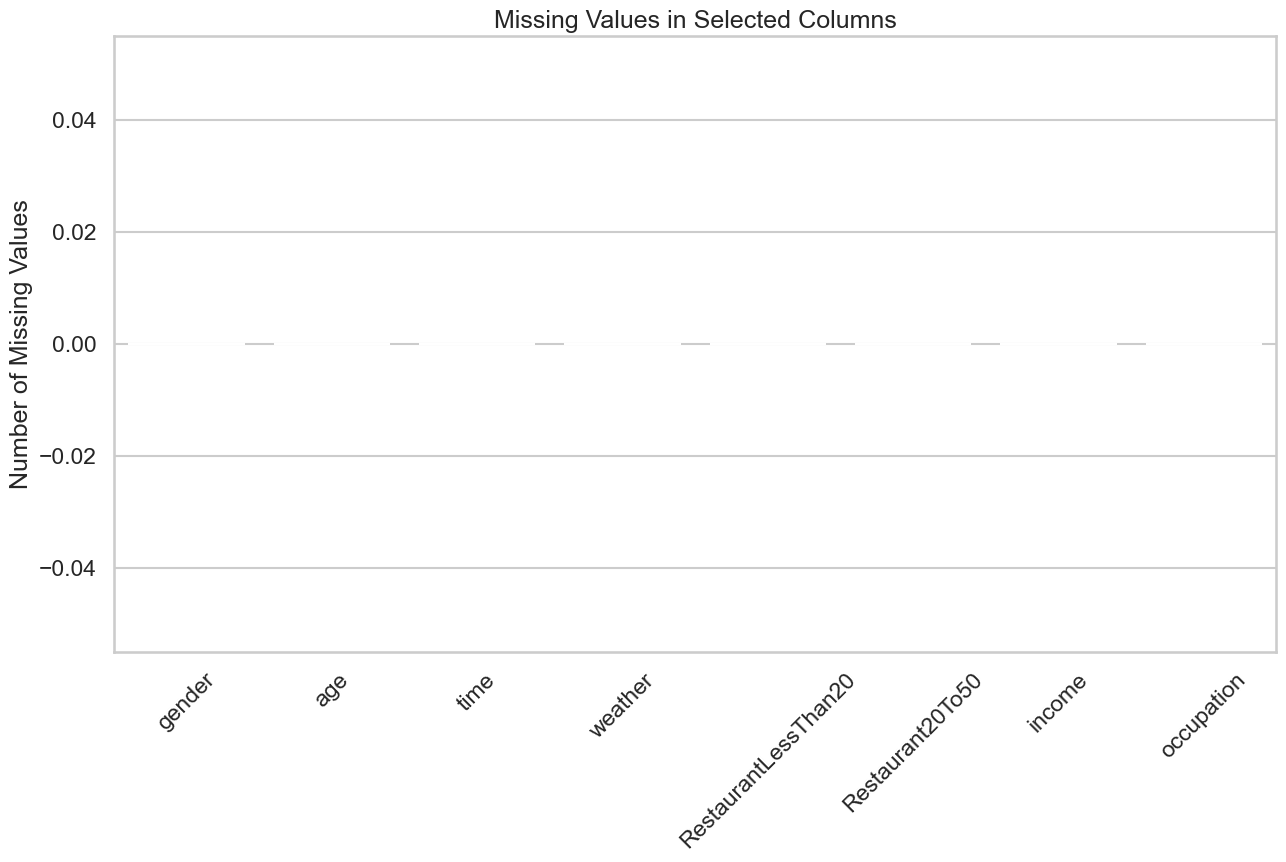

In [32]:
# Check data types of columns 
selected_columns = ['gender', 'age', 'time', 'weather',
                    'RestaurantLessThan20', 'Restaurant20To50', 'income', 'occupation']

# Check data types of relevant columns
print(data[selected_columns].dtypes)

# display possible unique values for ease of analysis
for column in selected_columns:
    unique_vals = data[column].unique()
    print(f"{column} ({data[column].dtypes}):")
    print(f"    Total unique values: {len(unique_vals)}")
    print(f"    Sample unique values: {unique_vals[:5]}")
    print("****-----------------------****")

# Check missing values
missing_values = data[selected_columns].isnull().sum()

# Plot to see visually the missing values
plt.figure(figsize=(15, 8))
sns.barplot(x=missing_values.index, y=missing_values.values)
plt.xticks(rotation=45)
plt.ylabel('Number of Missing Values')
plt.title('Missing Values in Selected Columns')
plt.show()

# Replace missing values with 'unknown' for the selected columns
data[selected_columns] = data[selected_columns].fillna('unknown')

        gender    age   time weather RestaurantLessThan20 Restaurant20To50  \
count    12684  12684  12684   12684                12684            12684   
unique       2      8      5       3                    6                6   
top     Female     21    6PM   Sunny                  1~3            less1   
freq      6511   2653   3230   10069                 5376             6077   

                 income  occupation  
count             12684       12684  
unique                9          25  
top     $25000 - $37499  Unemployed  
freq               2013        1870  


/usr/local/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dty

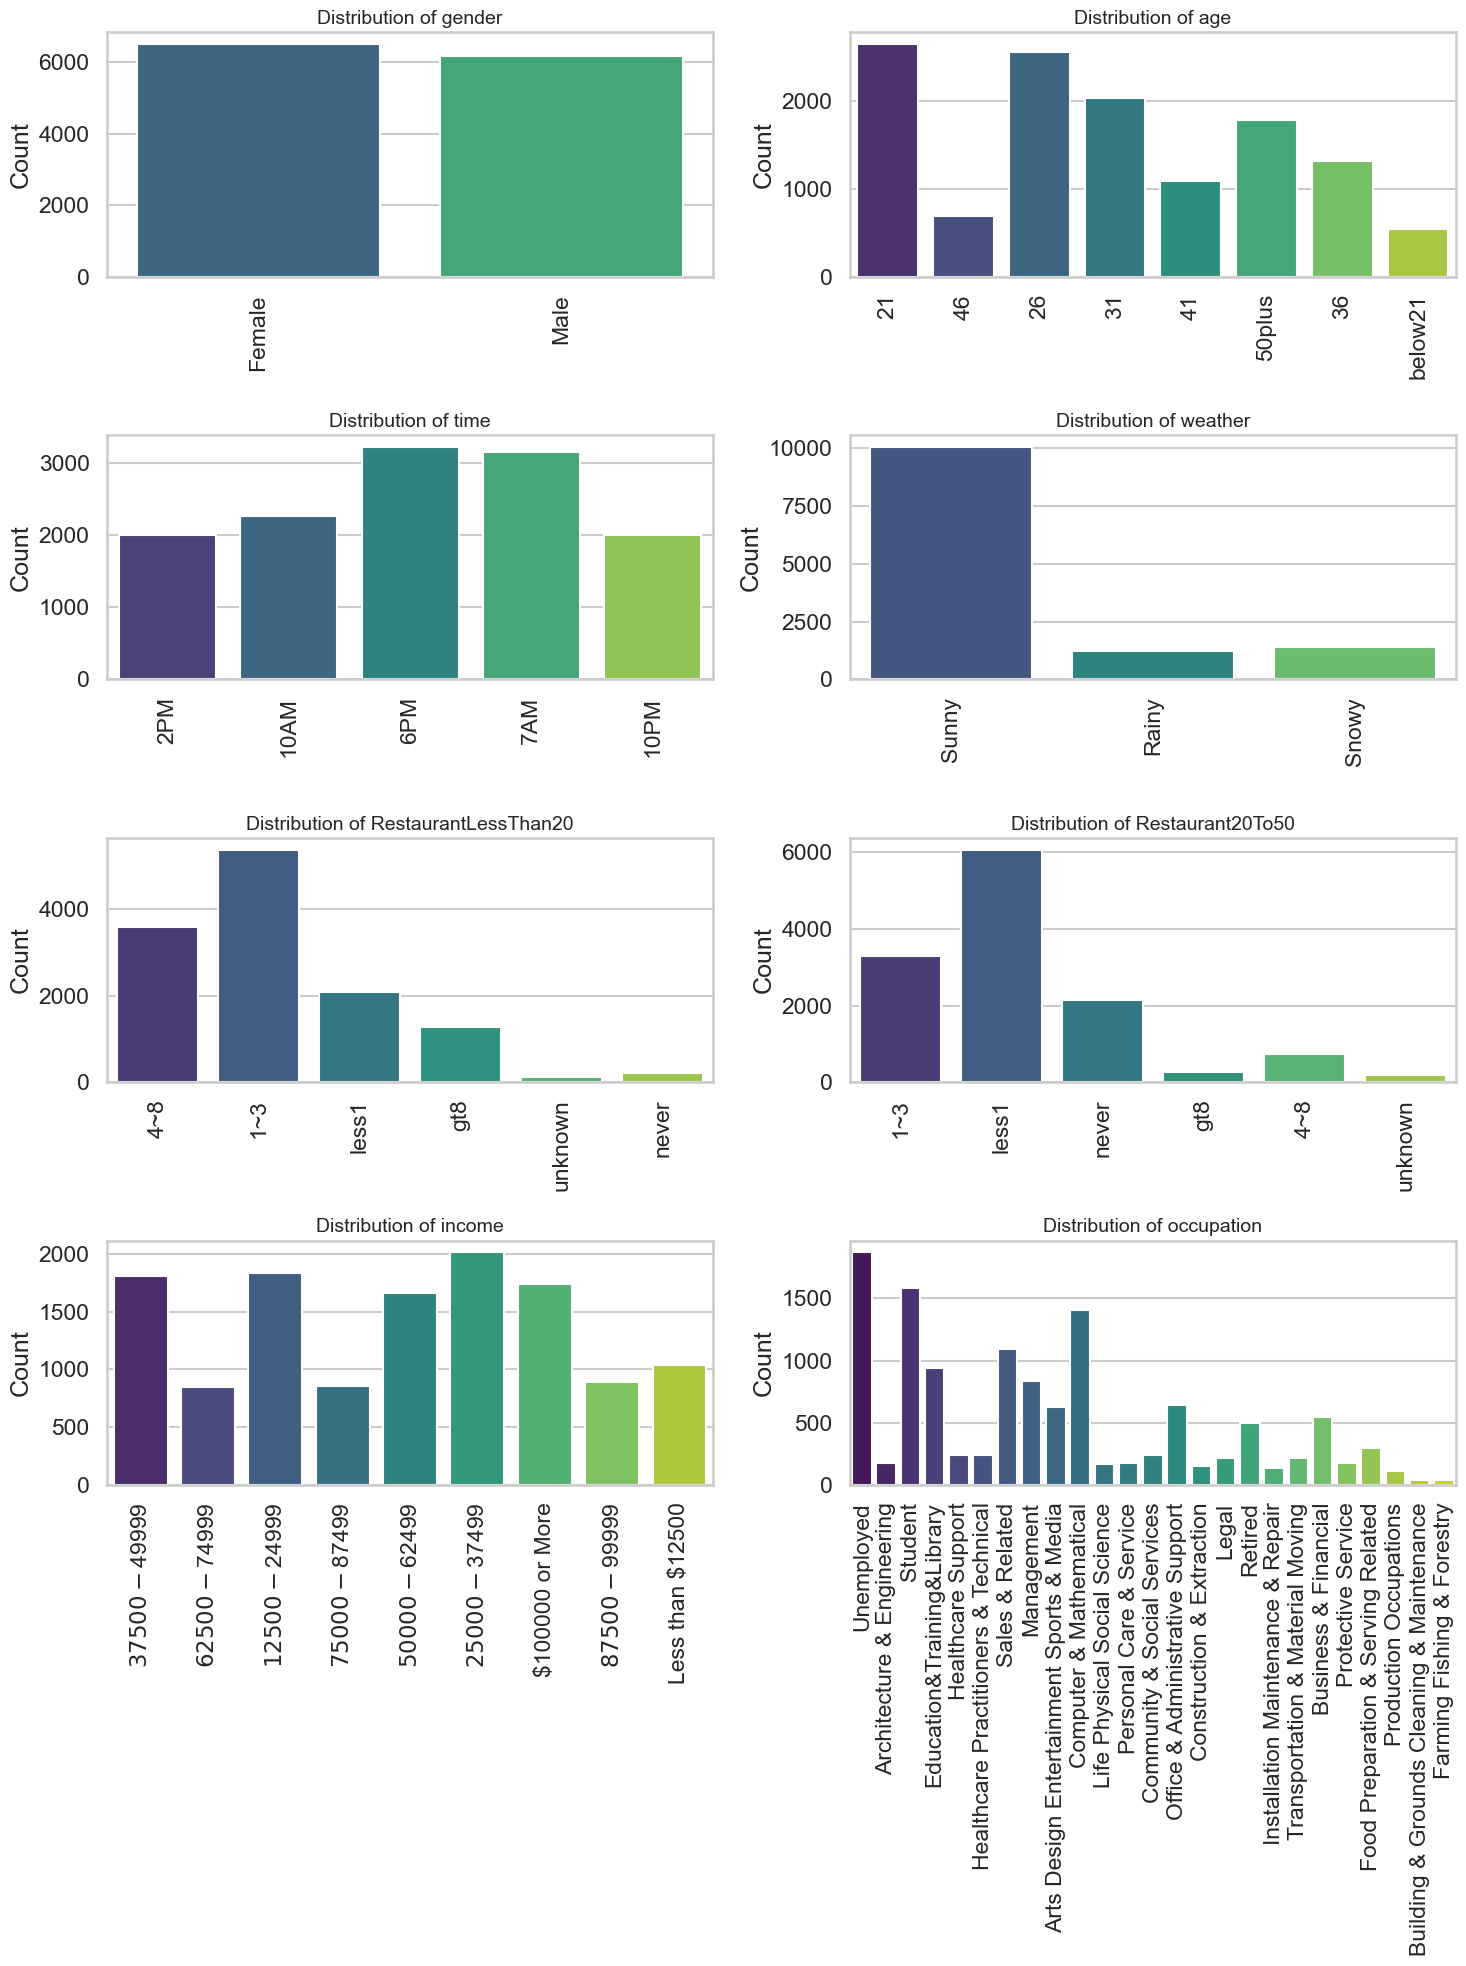

In [37]:
# Print out summary statistics for selected columns and descriptions
print(data[selected_columns].describe(include='all'))

# Visualize each column
sns.set_style('whitegrid')

# Number of rows (assuming 2 columns)
num_rows = len(selected_columns) // 2 + len(selected_columns) % 2

# Create a main figure and axes for our subplots
fig, axes = plt.subplots(num_rows, 2, figsize=(15, 5 * num_rows))

for idx, col in enumerate(selected_columns):
    row_idx = idx // 2
    col_idx = idx % 2
    ax = axes[row_idx, col_idx]

    # For categorical data use countplot
    if data[col].dtype == 'object':
        sns.countplot(data=data, x=col, ax=ax, palette="viridis")
    else:  # For numeric or ordinal data, use a histogram
        sns.histplot(data[col], ax=ax, bins=20, kde=True, color='skyblue')

    ax.set_title(f'Distribution of {col}', fontsize=14)
    ax.set_ylabel('Count')
    ax.set_xlabel('')
    for tick in ax.get_xticklabels():
        tick.set_rotation(90)

# Adjust the layout for better appearance
plt.tight_layout()
plt.show()


/usr/local/lib/python3.11/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


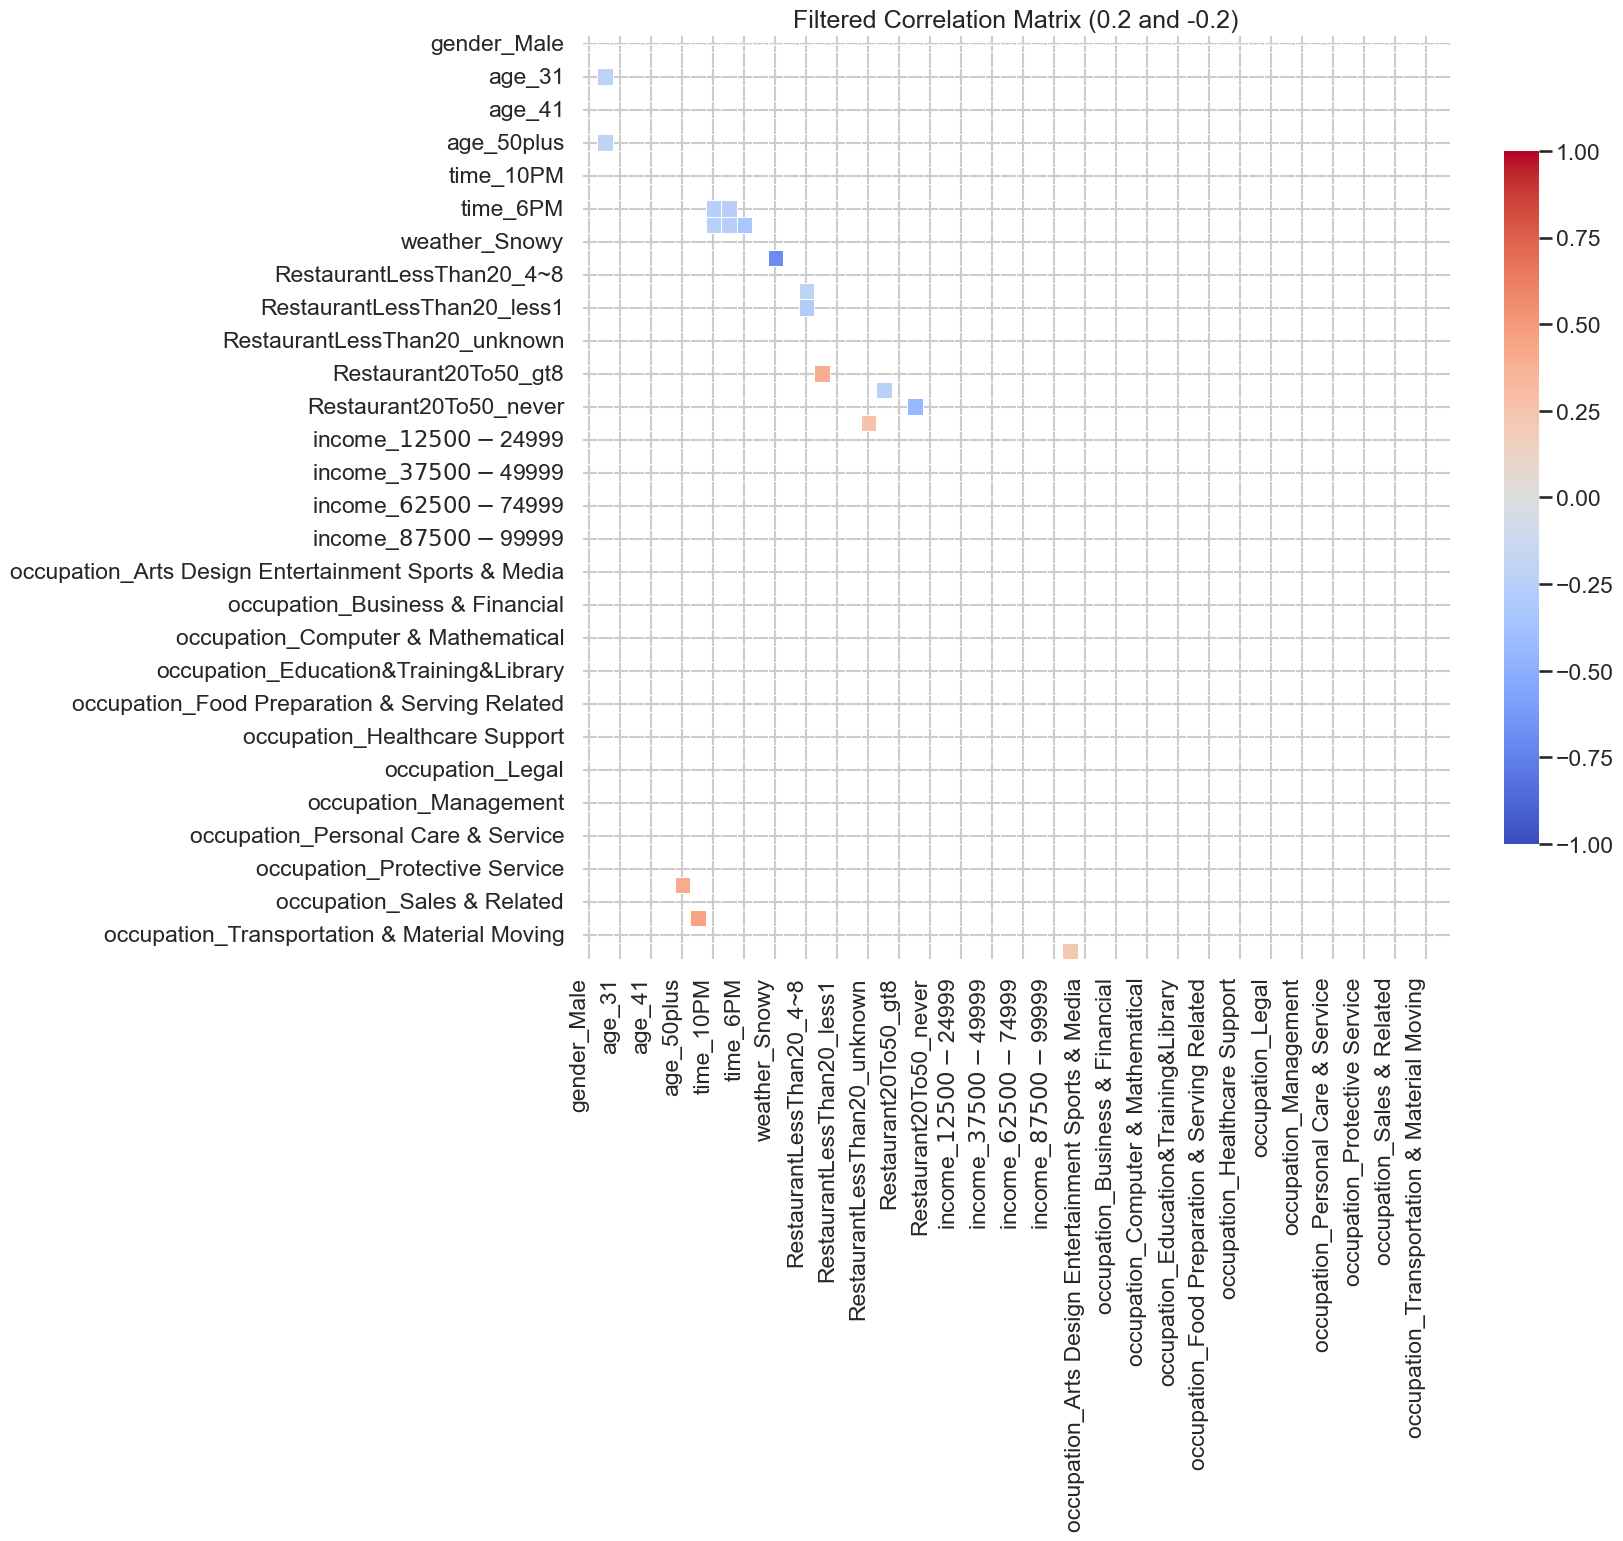

In [54]:

# Calculate the correlation matrix
df_encoded = pd.get_dummies(data[['gender', 'age', 'time', 'weather', 'RestaurantLessThan20',
                            'Restaurant20To50', 'income', 'occupation']], drop_first=True)
corr_matrix = df_encoded.corr()

# Mask the values that are not above 0.5 or below -0.5 with NaN
filtered_vals = corr_matrix.mask((corr_matrix < 0.2) & (corr_matrix > -0.2))

# Remove rows and columns without any significant correlation values
filtered_vals.dropna(axis=0, how='all', inplace=True)
filtered_vals.dropna(axis=1, how='all', inplace=True)

# Using matplotlib to setup base figure
plt.figure(figsize=(14, 12))

# Generate a mask for the upper triangle (this is for aesthetic purposes to make the heatmap easier to read)
mask = np.triu(np.ones_like(filtered_vals, dtype=bool))

# Draw the heatmap with the mask
ax = sns.heatmap(filtered_vals,
                 mask=mask,
                 cmap="coolwarm",
                 annot=True,
                 cbar_kws={"shrink": 0.75},
                 linewidths=0.5,
                 vmin=-1, vmax=1)
            
plt.title("Filtered Correlation Matrix (0.2 and -0.2)")
plt.xticks(rotation=90, ha='right')
plt.yticks(rotation=0)
plt.show()


In [55]:
# Based on some visuals, check criteria for analysis
specific_criteria_mask = (
    (data['gender'] == 'Female') &
    (data['occupation'] == 'Student') &
    (data['maritalStatus'] == 'Single') &
    (data['Bar'].isin(['4~8', 'gt8'])) &
    (data['coupon'] == 'Coffee House')
)

# masking and only show acceptance column
specific_criteria_acceptance_rate = data[specific_criteria_mask]['Y'].mean()

female_only_mask = data['gender'] == 'Female'
female_only_acceptance_rate = data[female_only_mask]['Y'].mean()

student_only_mask = data['occupation'] == 'Student'
student_only_acceptance_rate = data[student_only_mask]['Y'].mean()

single_only_mask = data['maritalStatus'] == 'Single'
single_only_acceptance_rate = data[single_only_mask]['Y'].mean()

bar_frequent_mask = data['Bar'].isin(['4~8', 'gt8'])
bar_frequent_acceptance_rate = data[bar_frequent_mask]['Y'].mean()

coffee_house_coupon_mask = data['coupon'] == 'Coffee House'
coffee_house_coupon_acceptance_rate = data[coffee_house_coupon_mask]['Y'].mean()

print(
    f"Specific Criteria Acceptance Rate: {specific_criteria_acceptance_rate:.2%}")
print(f"Female Only Acceptance Rate: {female_only_acceptance_rate:.2%}")
print(f"Student Only Acceptance Rate: {student_only_acceptance_rate:.2%}")
print(f"Single Only Acceptance Rate: {single_only_acceptance_rate:.2%}")
print(f"Bar Frequent Acceptance Rate: {bar_frequent_acceptance_rate:.2%}")
print(
    f"Coffee House Coupon Acceptance Rate: {coffee_house_coupon_acceptance_rate:.2%}")


Specific Criteria Acceptance Rate: 85.71%
Female Only Acceptance Rate: 54.72%
Student Only Acceptance Rate: 61.05%
Single Only Acceptance Rate: 60.59%
Bar Frequent Acceptance Rate: 62.25%
Coffee House Coupon Acceptance Rate: 49.92%


In [56]:
modified_criteria_mask = (
    (data['gender'] == 'Male') &
    (data['occupation'] == 'Unemployed') &
    (data['maritalStatus'] == 'Single') &
    (data['Bar'].isin(['4~8', 'gt8'])) &
    (data['coupon'] == 'Coffee House')
)

modified_criteria_acceptance_rate = data[modified_criteria_mask]['Y'].mean()

male_only_mask = data['gender'] == 'Male'
male_only_acceptance_rate = data[male_only_mask]['Y'].mean()

unemployed_only_mask = data['occupation'] == 'Unemployed'
unemployed_only_acceptance_rate = data[unemployed_only_mask]['Y'].mean()

print(
    f"Modified Criteria Acceptance Rate: {modified_criteria_acceptance_rate:.2%}")
print(f"Male Only Acceptance Rate: {male_only_acceptance_rate:.2%}")
print(
    f"Unemployed Only Acceptance Rate: {unemployed_only_acceptance_rate:.2%}")


Modified Criteria Acceptance Rate: 47.50%
Male Only Acceptance Rate: 59.08%
Unemployed Only Acceptance Rate: 54.81%
